In [1]:
#k means clustering
import numpy as np
import matplotlib.pyplot as plt
#pip install scikitlearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

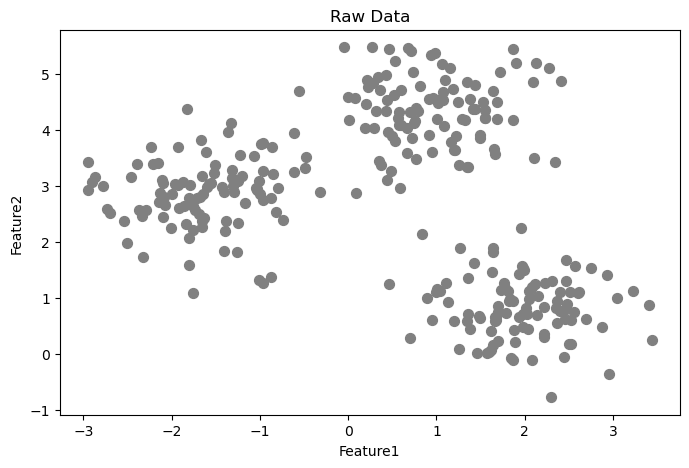

In [2]:
#Data generation
X, y = make_blobs(n_samples = 300, centers = 3, cluster_std = 0.6, random_state = 0)
plt.figure(figsize = (8,5))
plt.scatter(X[:,0],X[:,1], s = 50, color = 'gray')
plt.title ("Raw Data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

In [3]:
#Initiating the K means clustering
kmeans = KMeans(n_clusters=4, init = 'random', n_init = 10, max_iter = 300, random_state = 0)
kmeans.fit(X) # fitting the model to the data

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=4, n_init=10, random_state=0)

In [4]:
#getting the cluster assignment for each data point
y_kmeans = kmeans.predict(X)
centres = kmeans.cluster_centers_
print(f"Final centriod locations:\n{centres}")

Final centriod locations:
[[ 0.97152755  4.36899584]
 [-1.10112932  3.27481225]
 [ 1.95159369  0.83467497]
 [-1.98101448  2.56992767]]


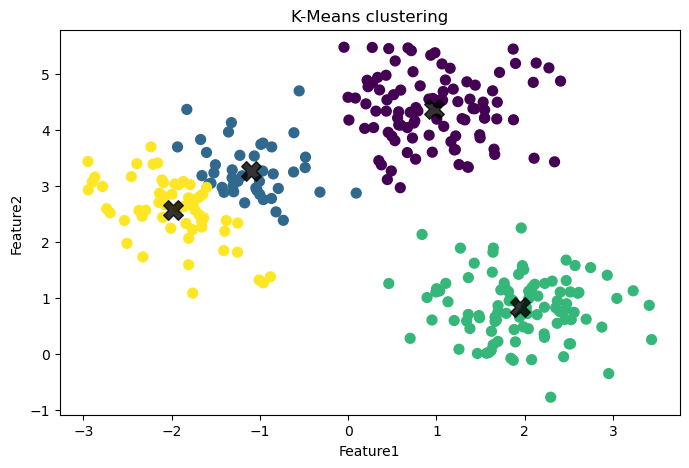

In [5]:
#plot the clusters
plt.figure(figsize = (8,5))
#color the clusters
plt.scatter(X[:,0],X[:,1], s = 50, c = y_kmeans, cmap = 'viridis', label = 'Data Points')
plt.scatter(centres[:,0],centres[:,1], c = 'black', s=200, alpha = 0.8, marker = 'X', label = 'Centroids')
plt.title ("K-Means clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

In [6]:
#opyimal number of K
wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chaud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
print(wcss)

[1517.0391167760833, 655.3392746547812, 212.355503489229, 182.8172000029704, 158.27205639862922, 137.15074788709242, 119.26880342393181, 103.48210247059615, 90.61648819448719, 82.02704359025562]


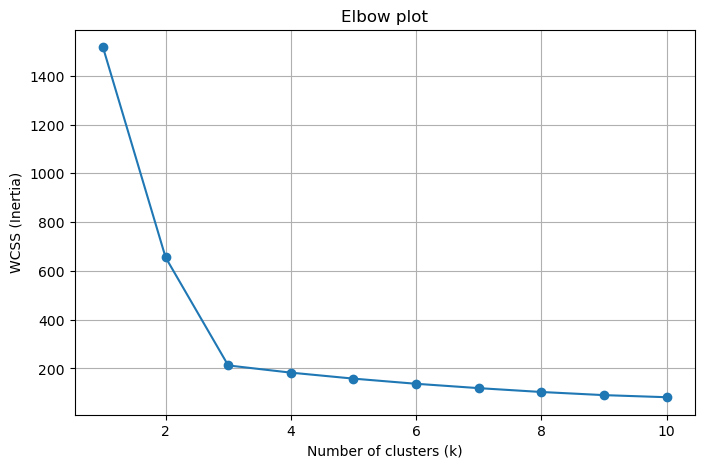

In [8]:
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker = 'o')
plt.title('Elbow plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()